In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
df1 = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\timeseries hackathon\Train_SU63ISt.csv", parse_dates = True)
df2 = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\timeseries hackathon\Test_0qrQsBZ.csv", parse_dates = True)
sample = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\timeseries hackathon\sample_submission_LSeus50.csv")

In [3]:
df1.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [5]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])

In [6]:
df1_c = df1.copy()

In [7]:
df1.drop(columns = 'ID', inplace = True)

In [8]:
df1.rename(columns = {"Datetime": 'ds', 'Count': 'y'}, inplace = True)

In [9]:
df1.head()

,ds,y
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [10]:
model = Prophet(daily_seasonality= True)
model_fit = model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
df2.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [12]:
df2_c = df2.copy()

In [13]:
df2.drop(columns = 'ID', inplace = True)

In [14]:
df2.rename(columns = {"Datetime": 'ds'}, inplace = True)

In [15]:
forecast = model_fit.predict(df2)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-10 00:00:00,203.788915,100.443458,326.105597,203.788915,203.788915,10.186021,10.186021,10.186021,5.293229,...,10.625272,10.625272,10.625272,-5.732479,-5.732479,-5.732479,0.0,0.0,0.0,213.974936
1,2014-01-10 01:00:00,203.831434,79.562012,301.252257,203.831434,203.831434,-12.701269,-12.701269,-12.701269,-17.183700,...,10.266620,10.266620,10.266620,-5.784189,-5.784189,-5.784189,0.0,0.0,0.0,191.130165
2,2014-01-10 02:00:00,203.873953,54.475187,288.091955,203.873953,203.873953,-35.750317,-35.750317,-35.750317,-39.784280,...,9.870226,9.870226,9.870226,-5.836262,-5.836262,-5.836262,0.0,0.0,0.0,168.123636
3,2014-01-10 03:00:00,203.916472,37.479831,261.208158,203.916472,203.916472,-53.754201,-53.754201,-53.754201,-57.301346,...,9.435842,9.435842,9.435842,-5.888696,-5.888696,-5.888696,0.0,0.0,0.0,150.162271
4,2014-01-10 04:00:00,203.958991,19.106260,245.387777,203.958991,203.958991,-65.365633,-65.365633,-65.365633,-68.387440,...,8.963295,8.963295,8.963295,-5.941488,-5.941488,-5.941488,0.0,0.0,0.0,138.593358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,2015-12-04 19:00:00,520.991068,267.461451,735.123974,327.861707,724.795625,-18.889793,-18.889793,-18.889793,38.815549,...,-2.607017,-2.607017,-2.607017,-55.098325,-55.098325,-55.098325,0.0,0.0,0.0,502.101276
5108,2015-12-04 20:00:00,521.009196,266.442902,740.610274,327.859137,724.845026,-23.215089,-23.215089,-23.215089,35.582204,...,-3.653167,-3.653167,-3.653167,-55.144126,-55.144126,-55.144126,0.0,0.0,0.0,497.794106
5109,2015-12-04 21:00:00,521.027323,253.772516,740.815356,327.856567,724.894427,-26.801008,-26.801008,-26.801008,33.116147,...,-4.727647,-4.727647,-4.727647,-55.189508,-55.189508,-55.189508,0.0,0.0,0.0,494.226315
5110,2015-12-04 22:00:00,521.045450,255.604972,715.656856,327.853997,724.943827,-31.057277,-31.057277,-31.057277,30.005855,...,-5.828662,-5.828662,-5.828662,-55.234470,-55.234470,-55.234470,0.0,0.0,0.0,489.988173


In [17]:
forecast1 = forecast[['ds', 'yhat']]
forecast1

,ds,yhat
0,2014-01-10 00:00:00,213.974936
1,2014-01-10 01:00:00,191.130165
2,2014-01-10 02:00:00,168.123636
3,2014-01-10 03:00:00,150.162271
4,2014-01-10 04:00:00,138.593358
...,...,...
5107,2015-12-04 19:00:00,502.101276
5108,2015-12-04 20:00:00,497.794106
5109,2015-12-04 21:00:00,494.226315
5110,2015-12-04 22:00:00,489.988173


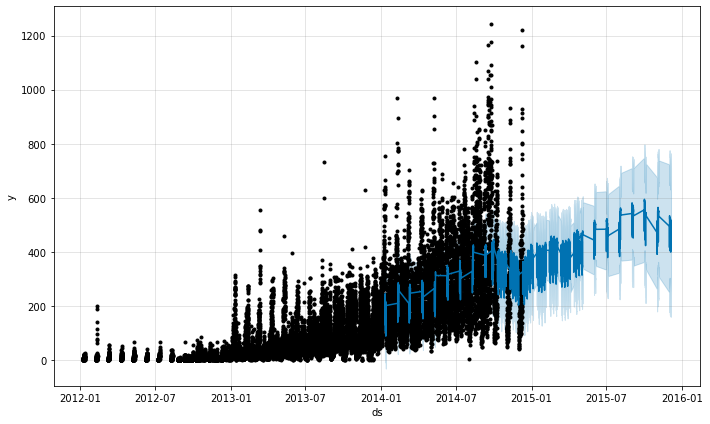

In [18]:
model.plot(forecast);

In [19]:
pred1 = df2_c.copy()
pred1['Datetime'] = forecast1['yhat']
pred1.rename(columns = {'Datetime': 'Count'}, inplace = True)
pred1.to_csv('fbprophettime.csv', index = False)

In [20]:
model1 = Prophet()
model1_fit = model1.fit(df1)

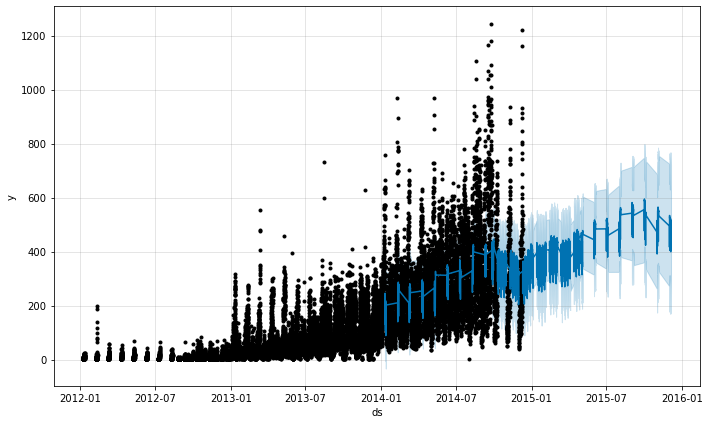

In [21]:
forecast2 = model1_fit.predict(df2)
forecast3 = forecast2[['ds', 'yhat']]
model1.plot(forecast2);

In [22]:
pred2 = df2_c.copy()
pred2['Datetime'] = forecast3['yhat']
pred2.rename(columns = {'Datetime': 'Count'}, inplace = True)
pred2.to_csv('fbprophettime2.csv', index = False)

In [23]:
model2 = Prophet(daily_seasonality = 'auto')
model2_fit = model2.fit(df1)

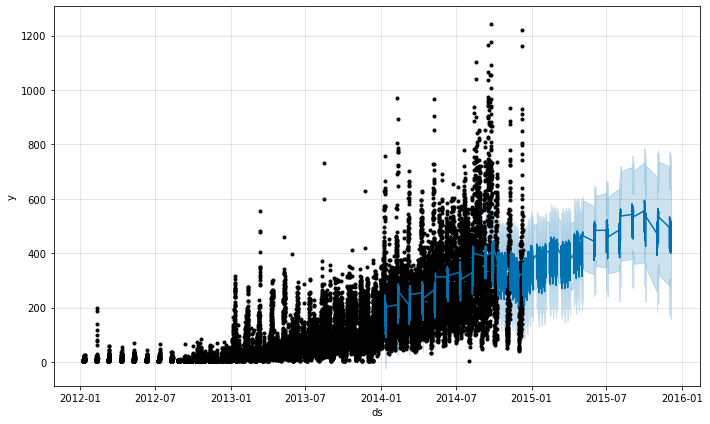

In [24]:
forecast4 = model2_fit.predict(df2)
forecast5 = forecast4[['ds', 'yhat']]
model2.plot(forecast4);

In [25]:
pred3 = df2_c.copy()
pred3['Datetime'] = forecast4['yhat']
pred3.rename(columns = {'Datetime': 'Count'}, inplace = True)
pred3.to_csv('fbprophettime3.csv', index = False)

In [26]:
model3 = Prophet(daily_seasonality = 'auto', weekly_seasonality = 'auto', yearly_seasonality = 'auto')
model3_fit = model3.fit(df1)

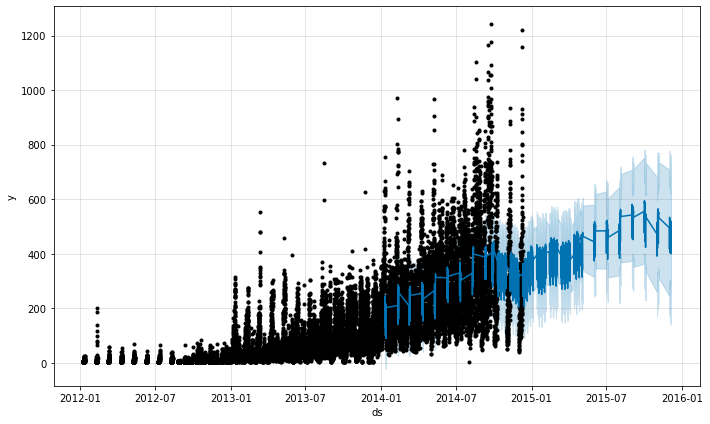

In [27]:
forecast6 = model3_fit.predict(df2)
forecast7 = forecast6[['ds', 'yhat']]
model3.plot(forecast6);

In [28]:
pred4 = df2_c.copy()
pred4['Datetime'] = forecast6['yhat']
pred4.rename(columns = {'Datetime': 'Count'}, inplace = True)
pred4.to_csv('fbprophettime4.csv', index = False)